<a href="https://colab.research.google.com/github/down-shift/dentistry-ekb-hack/blob/main/cavity_yolo_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import cv2
import time
from google.colab.patches import cv2_imshow

In [2]:
%cd /content/drive/MyDrive/Olymps/leadersofdigital/ekb/darknet

/content/drive/MyDrive/Olymps/leadersofdigital/ekb/darknet


In [ ]:
%cp data/obj.names data/coco.names

In [3]:
img_path = '/content/drive/MyDrive/Olymps/leadersofdigital/ekb/test/' + os.listdir('/content/drive/MyDrive/Olymps/leadersofdigital/ekb/test/')[1]
img_path

'/content/drive/MyDrive/Olymps/leadersofdigital/ekb/test/0_ (21).jpg'

## Via Shell

In [7]:
!chmod +x ./darknet

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 24, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  10

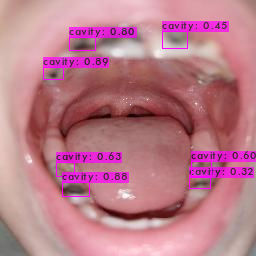

In [23]:
img_path = '/content/drive/MyDrive/Olymps/leadersofdigital/ekb/test/' + os.listdir('/content/drive/MyDrive/Olymps/leadersofdigital/ekb/test/')[21]
!./darknet detect cfg/custom-yolov4-tiny-detector.cfg backup/custom-yolov4-tiny-detector_best.weights {img_path} -dont-show
cv2_imshow(cv2.imread('predictions.jpg'))

## Via CV2

In [4]:
!pip install -U opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
%cd /content

/content


In [26]:
wh = "/content/drive/MyDrive/Olymps/leadersofdigital/ekb/darknet/backup/custom-yolov4-tiny-detector_final.weights"
cfg = "/content/drive/MyDrive/Olymps/leadersofdigital/ekb/darknet/cfg/custom-yolov4-tiny-detector.cfg"
img_path = '/content/drive/MyDrive/Olymps/leadersofdigital/ekb/test/' + os.listdir('/content/drive/MyDrive/Olymps/leadersofdigital/ekb/test/')[35]

net = cv2.dnn.readNetFromDarknet(cfg, wh)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

ln = net.getLayerNames()
print(ln)
print(net.getUnconnectedOutLayers()[0])
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
print("-----")
print(ln)
print(net.getUnconnectedOutLayers())

CLASSES = ['caries']
COLORS = np.random.randint(0, 255, size=(len(CLASSES), 3), dtype="uint8")

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'slice_3', 'conv_4', 'bn_4', 'leaky_5', 'conv_5', 'bn_5', 'leaky_6', 'concat_6', 'conv_7', 'bn_7', 'leaky_8', 'concat_8', 'pool_9', 'conv_10', 'bn_10', 'leaky_11', 'slice_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'concat_14', 'conv_15', 'bn_15', 'leaky_16', 'concat_16', 'pool_17', 'conv_18', 'bn_18', 'leaky_19', 'slice_19', 'conv_20', 'bn_20', 'leaky_21', 'conv_21', 'bn_21', 'leaky_22', 'concat_22', 'conv_23', 'bn_23', 'leaky_24', 'concat_24', 'pool_25', 'conv_26', 'bn_26', 'leaky_27', 'conv_27', 'bn_27', 'leaky_28', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'permute_30', 'yolo_30', 'identity_31', 'conv_32', 'bn_32', 'leaky_33', 'upsample_33', 'concat_34', 'conv_35', 'bn_35', 'leaky_36', 'conv_36', 'permute_37', 'yolo_37')
66
-----
['yolo_30', 'yolo_37']
[66 78]


In [27]:
def detect(image, conf=0.4, thresh=0.4, s=(416, 416)): # s=(320, 320)
    (H, W) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, s, swapRB=True, crop=False)
    net.setInput(blob)

    layerOutputs = net.forward(ln)
    boxes = []
    confidences = []
    classIDs = []
    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > conf:
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf, thresh)
    bx = []
    cids = []
    confs = []

    if len(idxs) > 0:
        for i in idxs.flatten():
            bx.append(boxes[i])
            cids.append(classIDs[i])
            confs.append(confidences[i])

    return bx, cids, confs


def draw_boxes(img, boxes, ids, confs, CLASSES, COLORS=None):
    for i in range(len(boxes)):
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        x = int(x)
        y = int(y)
        w = int(w)
        h = int(h)
        color = (0, 255, 150)
        if COLORS is not None:
            color = [int(c) for c in COLORS[ids[i]]]

        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(CLASSES[ids[i]], confs[i])
        cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return img

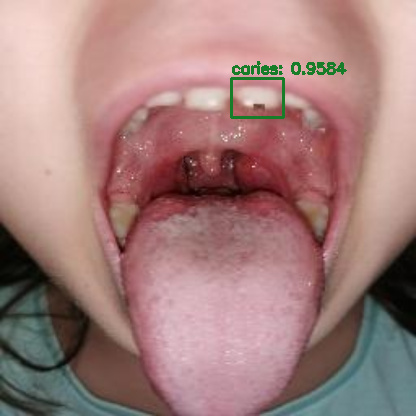

In [28]:
frame = cv2.imread(img_path)
frame = cv2.resize(frame, (416, 416))
boxes, classIDs, confidences = detect(frame) # s=(self.model_res, self.model_res), conf=conf
img_out = draw_boxes(frame, boxes, classIDs, confidences, CLASSES, COLORS=COLORS)
# print(boxes)
# print(frame.model_res)

cv2_imshow(img_out)